# Preparing the Data Set

## Importing Libraries

Basic libraries used in the analysis process:

- **Data Processing**: Pandas, Numpy
- **Visualization**: Plotly Express, WordCloud
- **Configuration**: Filtering of warning messages and Jupyter integration settings

In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import plotly.express as px

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Preliminary Dataset Review

Basic analysis performed to understand the dataset:

- Review of the first and last 5 records of the DataFrame
- Column types, memory usage and non-null value statistics
- Determining the total number of null values ​​in each column

In [2]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Filling in Missing Data

Filling strategies implemented to ensure data integrity:

- Empty values in `date_added, rating, duration, country` columns were filled with **mod**.
- Empty values in `director, cast` columns were filled with **unknown**.

In [6]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['director'] = df['director'].fillna('unknown')
df['cast'] = df['cast'].fillna('unknown')

## Removing and Transforming Columns

- **Column Removal**: Removing the 'show_id' column from the dataset, which is not required for analysis
- **'date_added' Cleanup**: Cleaning up unnecessary spaces in the date information and converting it to standard date format
- **'duration' Transformation**: Removing numeric values ​​from the duration information and converting it to integer format for consistent analysis

In [7]:
df.drop(columns=['show_id'], inplace=True)

df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

df['duration'] = df['duration'].str.extract('(\d+)').astype(int)

In [8]:
print(f"The total number of missing values in the dataset is: {df.isna().sum().sum()}")

The total number of missing values in the dataset is: 0


## Examining the Clean Data Set

- Displaying the first records of the cleaned data with `df.head()`
- Checking the data types and missing value status with `df.info()`

In [9]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,unknown,unknown,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8807 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   int64         
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 757.0+ KB


___
# Data Visualization

## Content Distribution

This pie chart shows the distribution of content on the Netflix platform as movies and series. As can be seen from the chart:

- Movies dominate the platform with a share of **69.6%**
- Series have a share of **30.4%**

In [11]:
netflix_colors = ['#b20710', '#221f1f']

fig = px.pie(df, 
             names='type',
             title='Netflix Content Distribution',
             color_discrete_sequence=netflix_colors,
             hole=0.4)

fig.update_layout(
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    title_x=0.5,
    title_font_size=24,
    showlegend=True,
    legend_title_text='Content Type',
    width=800,
    height=800
)

fig.update_traces(textposition='inside', 
                 textinfo='percent+label',
                 textfont_size=14)

fig.show()

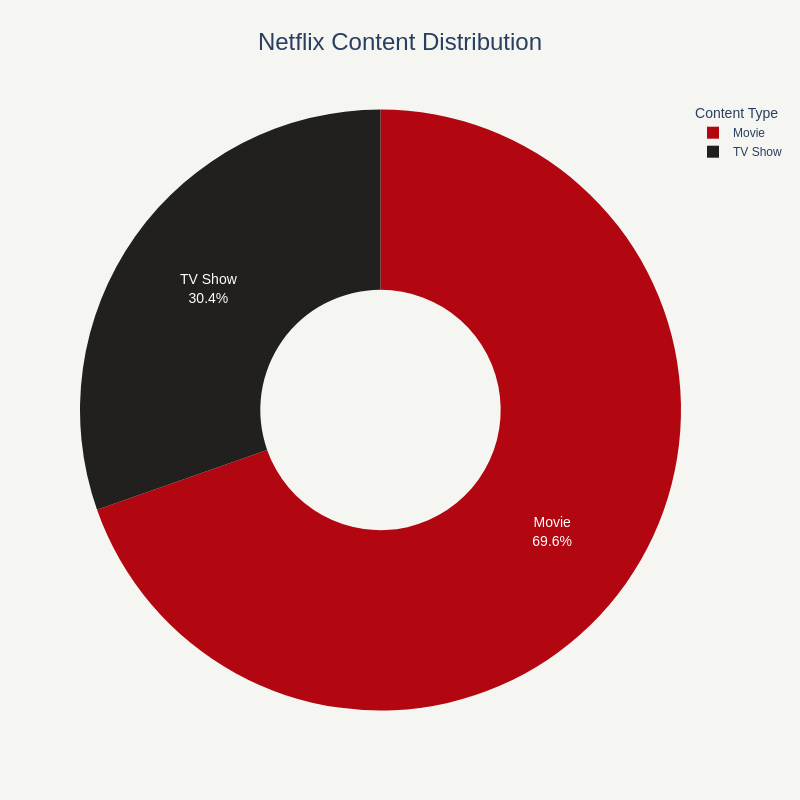

## Netflix Content Distribution by Age Group

This sunburst chart shows the distribution of Netflix content by age group and content type.

### Movie Categories (Red Shades)
- Adult: The largest segment
- Teen: The second largest category
- Family: The third largest category
- Kids: The smallest category

### Series Categories (Gray Shades)
- Adult: The largest segment
- Family: The second largest category
- Kids: The third largest category
- Teen: The smallest category

In [12]:
rating_mapping = {
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-Y7-FV': 'Kids',
    'TV-G': 'Kids',
    'G': 'Kids',
    'PG': 'Family',
    'TV-PG': 'Family',
    'PG-13': 'Teen',
    'TV-14': 'Teen',
    'R': 'Adult',
    'TV-MA': 'Adult',
    'NC-17': 'Adult',
    'NR': 'Adult',
    'UR': 'Adult'
}

df['age_group'] = df['rating'].map(rating_mapping)

rating_type_count = df.groupby(['type', 'age_group']).size().reset_index(name='count')

fig = px.sunburst(rating_type_count, 
                  path=['type', 'age_group'], 
                  values='count',
                  color='type',
                  color_discrete_map={'Movie': '#b20710', 'TV Show': '#221f1f'},
                  width=800,
                  height=800)

fig.update_layout(
    title={
        'text': 'Netflix Content Distribution by Age Groups',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1'
)

fig.show()

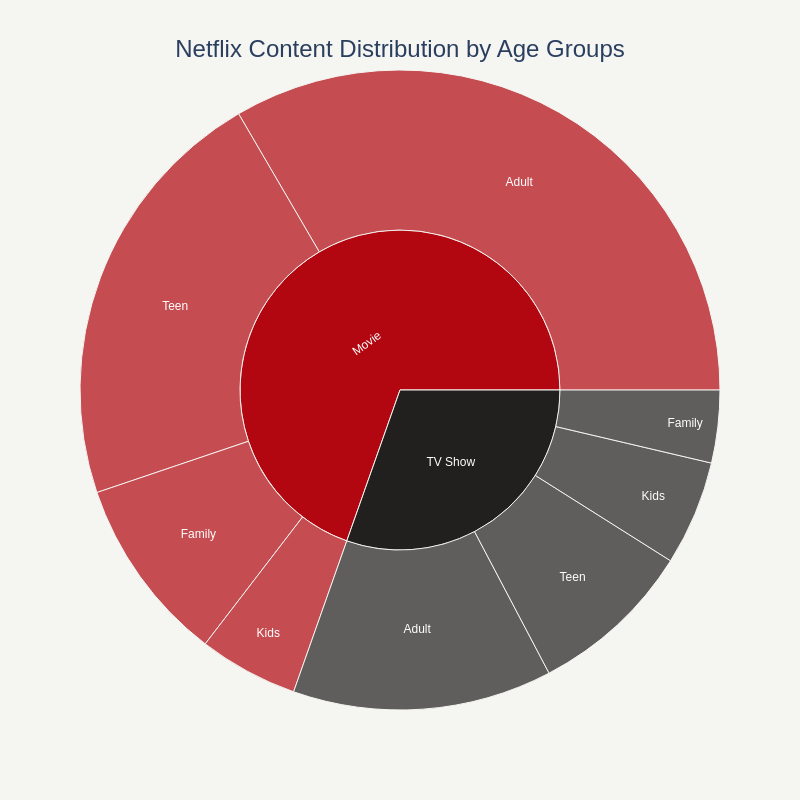

## Movie Distribution by Country

This map chart shows the distribution of movies on Netflix around the world. Key takeaways from the map:

- The United States stands out as the country with the highest movie density
- India and the United Kingdom are also among the countries with high movie density

The color scale used in the map:
- Dark red tones indicate high movie density
- Light tones indicate low movie density
- White areas indicate regions with no data

In [13]:
country_content = df.assign(country=df['country'].str.split(',')).explode('country')
country_content['country'] = country_content['country'].str.strip()

movies_by_country = country_content[country_content['type'] == 'Movie']['country'].value_counts().reset_index()
movies_by_country.columns = ['country', 'count']
movies_by_country['original_count'] = movies_by_country['count']
movies_by_country['count'] = np.log1p(movies_by_country['count'])

shows_by_country = country_content[country_content['type'] == 'TV Show']['country'].value_counts().reset_index()
shows_by_country.columns = ['country', 'count']
shows_by_country['original_count'] = shows_by_country['count']
shows_by_country['count'] = np.log1p(shows_by_country['count'])

In [14]:
fig_movies = px.choropleth(movies_by_country, 
                          locations='country',
                          locationmode='country names',
                          color='count',
                          color_continuous_scale=['#f5f5f1', '#b20710'],
                          title='Netflix Movies Distribution by Country',
                          labels={'count': 'Density',
                                 'original_count': 'Total Movies',
                                 'country': 'Country'},
                          hover_data=['original_count'])

fig_movies.update_layout(
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    title_x=0.5,
    title_font_size=24,
    width=1200,
    height=800,
    geo=dict(showframe=False,
             showcoastlines=True,
             projection_type='equirectangular'),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig_movies.update_coloraxes(colorbar_title_text='Density')
fig_movies.update_traces(hovertemplate='<b>%{location}</b><br>Total Movies: %{customdata[0]}<extra></extra>')

fig_movies.show()

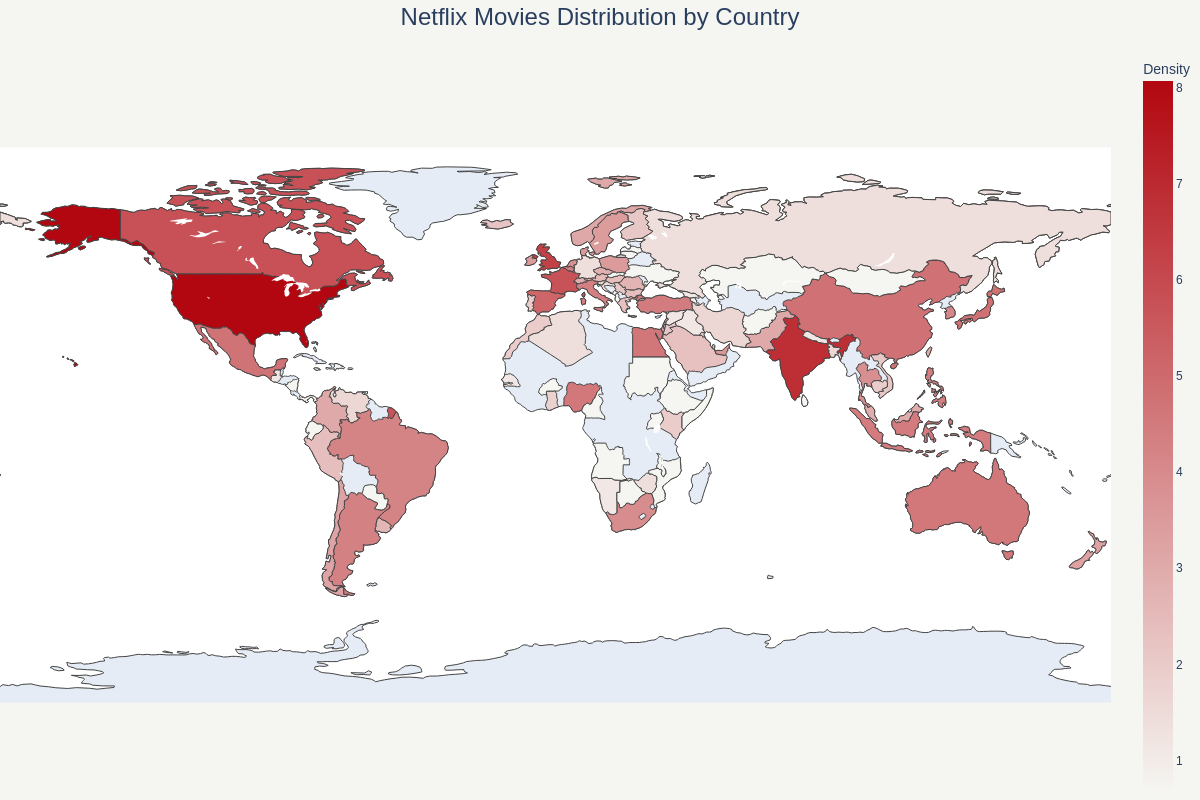

## Distribution of Series by Country

This map chart shows the distribution of series on Netflix worldwide. Key takeaways from the map:

- The United States stands out as the country with the highest density of series production
- The United Kingdom and Japan are other major countries with high density of series

Color scale used on the map:
- Dark black tones indicate high density of series
- Light gray tones indicate low density of series
- White areas indicate regions with no data

In [15]:
fig_shows = px.choropleth(shows_by_country, 
                         locations='country',
                         locationmode='country names',
                         color='count',
                         color_continuous_scale=['#f5f5f1', '#221f1f'],
                         title='Netflix TV Shows Distribution by Country',
                         labels={'count': 'Density',
                                'original_count': 'Total TV Shows',
                                'country': 'Country'},
                         hover_data=['original_count'])

fig_shows.update_layout(
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    title_x=0.5,
    title_font_size=24,
    width=1200,
    height=800,
    geo=dict(showframe=False,
             showcoastlines=True,
             projection_type='equirectangular'),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig_shows.update_coloraxes(colorbar_title_text='Density')
fig_shows.update_traces(hovertemplate='<b>%{location}</b><br>Total TV Shows: %{customdata[0]}<extra></extra>')

fig_shows.show()

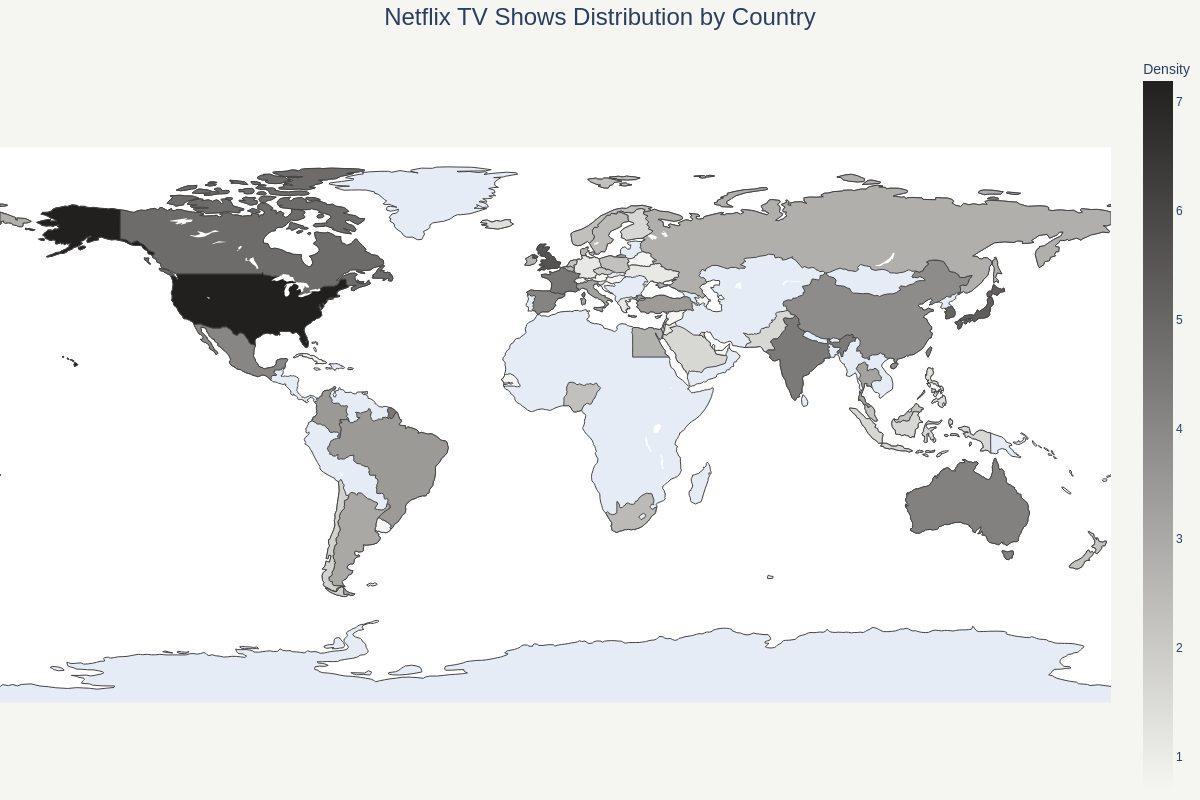

## Content Distribution Rates in the Top 10 Countries

This horizontal bar chart shows the distribution rates of movies and TV shows for the top 10 countries with the most content on Netflix.

- South Korea and Japan have a content catalog that is heavily dominated by TV shows:
* South Korea: 73.6% TV shows, 26.4% movies
* Japan: 62.6% TV shows, 37.4% movies

- India and Germany have a content catalog that is heavily dominated by movies:
* India: 92.0% TV shows, 8.0% TV shows
* Germany: 80.5% TV shows, 19.5% TV shows

In [16]:
top_10_countries = country_content.groupby('country')['type'].count().sort_values(ascending=False).head(10)
top_10_data = country_content[country_content['country'].isin(top_10_countries.index)]

content_ratio = pd.crosstab(top_10_data['country'], 
                           top_10_data['type'], 
                           normalize='index') * 100

content_ratio = content_ratio.sort_values(by='TV Show', ascending=True)

fig = px.bar(content_ratio.reset_index(), 
             x=['TV Show', 'Movie'], 
             y='country',
             title='Content Distribution Ratio in Top 10 Countries',
             orientation='h',
             barmode='relative',
             color_discrete_sequence=['#221f1f', '#b20710'])

fig.update_layout(
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    title_x=0.5,
    title_font_size=24,
    width=1200,
    height=800,
    xaxis_title='Percentage',
    yaxis_title='Country',
    legend_title='Content Type'
)

fig.update_traces(texttemplate='%{x:.1f}%', textposition='inside')
fig.show()

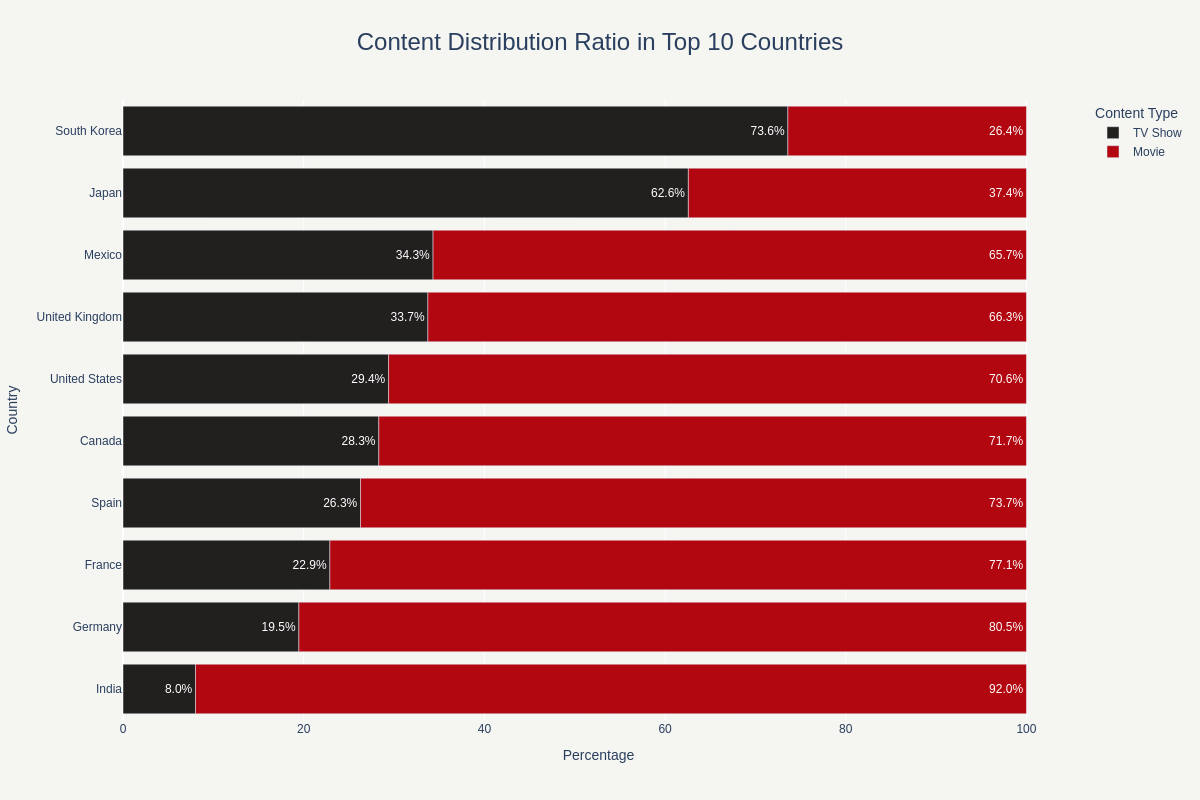

## Country Series Categories

This treemap chart shows the distribution of Netflix's most popular countries in terms of series categories.

### United States
* TV Comedies
* TV Dramas
* Docuseries

### United Kingdom
* British TV Shows
* Docuseries

### South Korea
* Korean TV Shows
* International TV Shows
* Romance TV Shows

### Japan
* Anime Series
* International TV Shows

### India
* TV Dramas
* TV Comedies

In [17]:
top_countries = df[df['type'] == 'TV Show']['country'].value_counts().head(5).index

country_genre_data = []
for index, row in df[(df['type'] == 'TV Show') & (df['country'].isin(top_countries))].iterrows():
    country = row['country']
    for genre in row['listed_in'].split(','):
        country_genre_data.append({
            'country': country,
            'genre': genre.strip()
        })

country_genre_df = pd.DataFrame(country_genre_data)
country_genre_counts = country_genre_df.groupby(['country', 'genre']).size().reset_index(name='count')

fig = px.treemap(country_genre_counts,
                 path=[px.Constant("All Countries"), 'country', 'genre'],
                 values='count',
                 title='TV Show Categories by Top Countries',
                 color_discrete_sequence=['#221f1f', '#b20710', '#e50914', '#831010'],
                 template='plotly_white')

fig.update_layout(
    title_x=0.5,
    title_font_size=40,
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    width=1200,
    height=900,
    font=dict(size=20)
)

fig.update_traces(textfont=dict(size=25))

fig.show()

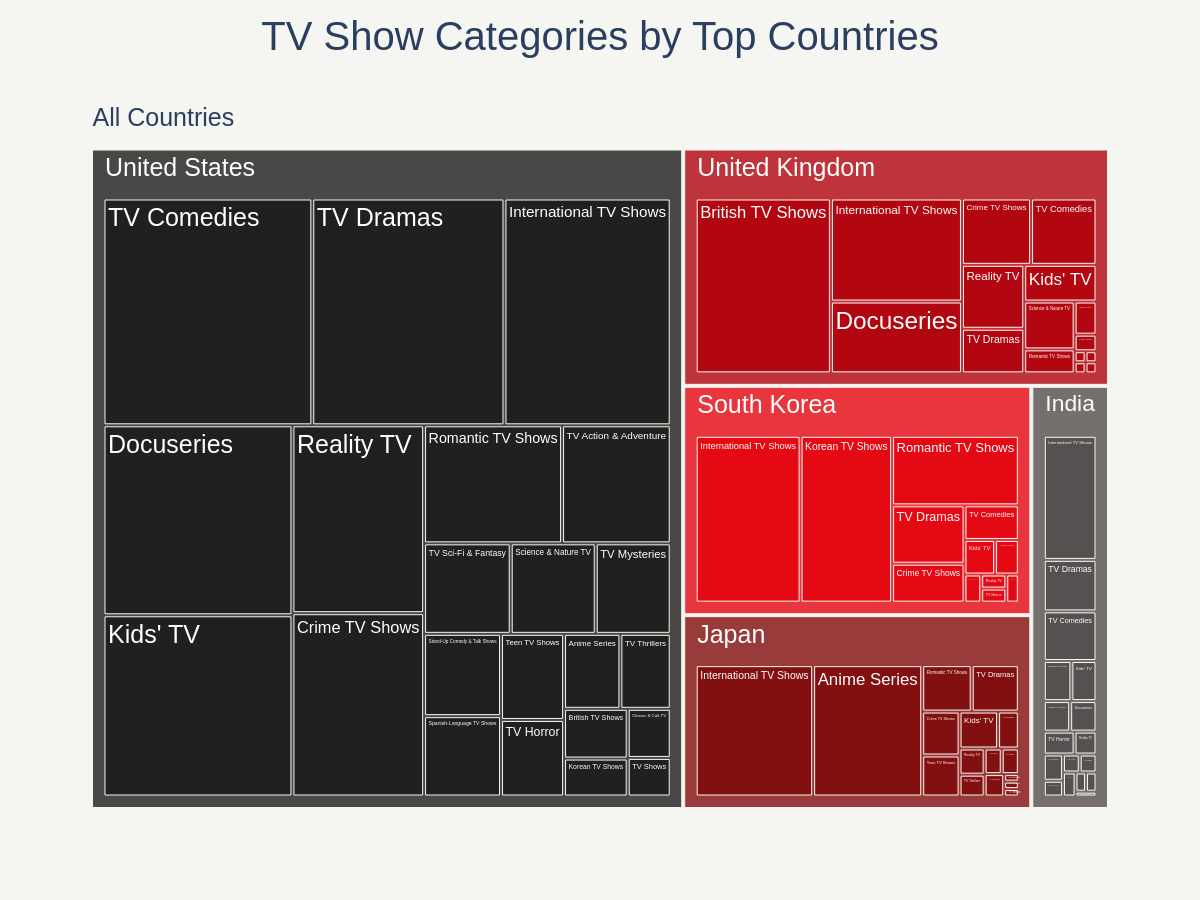

## Country Movie Categories

This treemap chart shows the distribution of movie categories in the countries with the most content on Netflix.

### United States
* Dramas
* Comedies
* Documentaries

### India
* International Movies
* Dramas
* Comedies

### United Kingdom
* Documentaries
* Dramas
* International Movies
* Comedies

### Spain
* International Movies
* Dramas
* Thrillers

### Canada
* Comedies
* Dramas
* Independent Movies

In [18]:
top_countries = df[df['type'] == 'Movie']['country'].value_counts().head(5).index

country_genre_data = []
for index, row in df[(df['type'] == 'Movie') & (df['country'].isin(top_countries))].iterrows():
    country = row['country']
    for genre in row['listed_in'].split(','):
        country_genre_data.append({
            'country': country,
            'genre': genre.strip()
        })

country_genre_df = pd.DataFrame(country_genre_data)
country_genre_counts = country_genre_df.groupby(['country', 'genre']).size().reset_index(name='count')

fig = px.treemap(country_genre_counts,
                 path=[px.Constant("All Countries"), 'country', 'genre'],
                 values='count',
                 title='Movie Categories by Top Countries',
                 color_discrete_sequence=['#221f1f', '#b20710', '#e50914', '#831010'],
                 template='plotly_white')

fig.update_layout(
    title_x=0.5,
    title_font_size=40,
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    width=1200,
    height=900,
    font=dict(size=20)
)

fig.update_traces(textfont=dict(size=25))

fig.show()

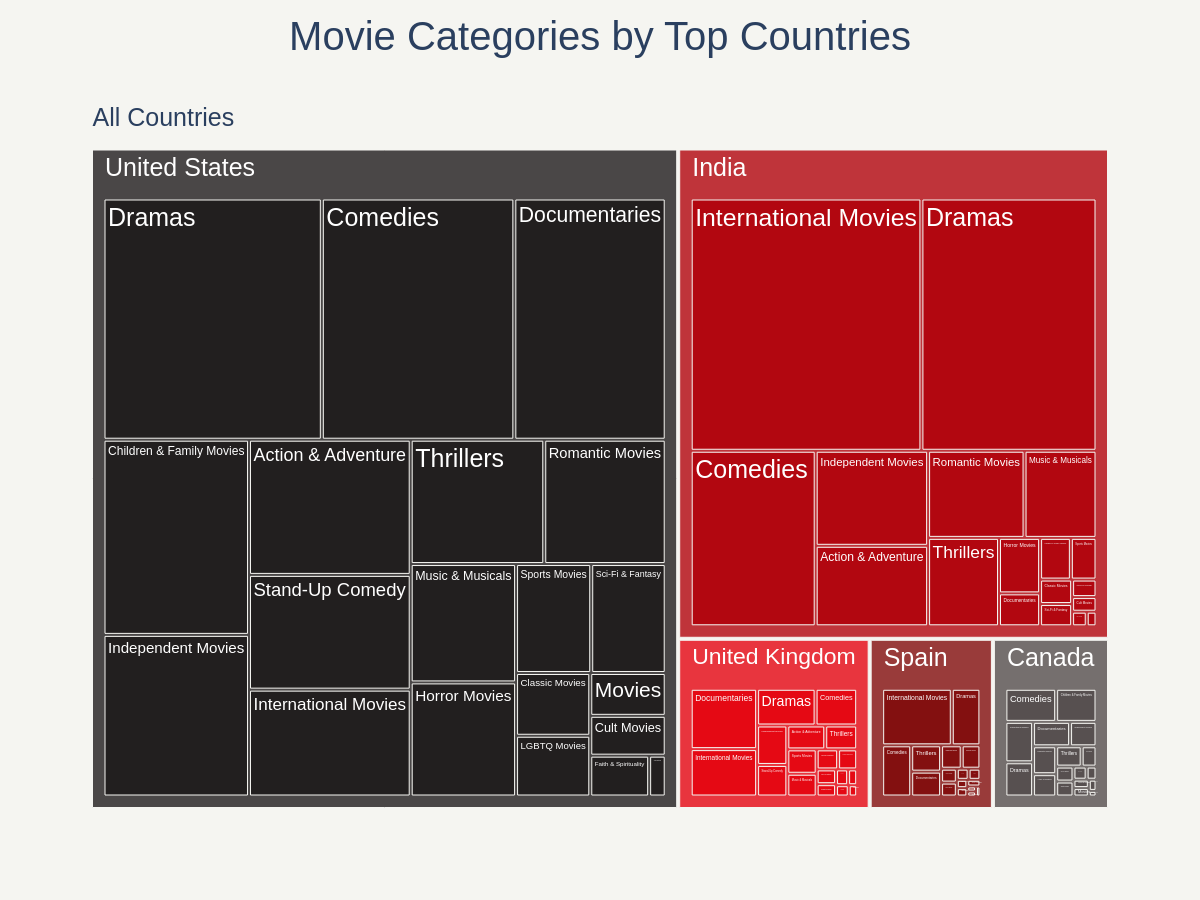

## Average Season and Movie Runtimes by Genre

These two charts show the average runtimes of TV shows and movies on Netflix by genre.

### Average Movie Runtimes by Genre
- Longest Movies:
* Classic Movies (118 minutes)
* Action & Adventure (113 minutes)
* Dramas (112 minutes)
>
- Shortest Movies:
* Stand-Up Comedy (67 minutes)
* Kids & Family Movies (79 minutes)
* Documentaries (83 minutes)

### Average Number of Seasons by Genre
- Longest Series:
* Classic & Cult TV (5.5 seasons)
* Sci-Fi & Fantasy (2.6 seasons)
* Action & Adventure (2.4 seasons)
>
- Shortest Series:
* TV Shows (1 season)
* Korean Dramas (1.2 seasons)
* Science & Nature (1.3 seasons)

In [19]:
movie_data = []
for index, row in df[df['type'] == 'Movie'].iterrows():
    for genre in row['listed_in'].split(','):
        movie_data.append({
            'genre': genre.strip(),
            'duration': row['duration']
        })

show_data = []
for index, row in df[df['type'] == 'TV Show'].iterrows():
    for genre in row['listed_in'].split(','):
        show_data.append({
            'genre': genre.strip(),
            'duration': row['duration']
        })

movie_df = pd.DataFrame(movie_data)
show_df = pd.DataFrame(show_data)

movie_duration = movie_df.groupby('genre')['duration'].mean().reset_index()
show_duration = show_df.groupby('genre')['duration'].mean().reset_index()

fig1 = px.bar(movie_duration.sort_values('duration', ascending=False), 
              x='genre', 
              y='duration',
              title='Average Movie Duration by Genre (Minutes)',
              color_discrete_sequence=['#b20710'],
              template='plotly_white')

fig2 = px.bar(show_duration.sort_values('duration', ascending=False), 
              x='genre', 
              y='duration',
              title='Average Number of Seasons by Genre',
              color_discrete_sequence=['#221f1f'],
              template='plotly_white')

fig1.update_layout(
    showlegend=False,
    title_x=0.5,
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    title_font_size=24,
    xaxis_tickangle=45,
    xaxis_title='Genre',
    yaxis_title='Duration (Minutes)',
    height=600,
    width=1000
)

fig2.update_layout(
    showlegend=False,
    title_x=0.5,
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    title_font_size=24,
    xaxis_tickangle=45,
    xaxis_title='Genre',
    yaxis_title='Seasons',
    height=600,
    width=1000
)
    
fig1.show()
fig2.show()

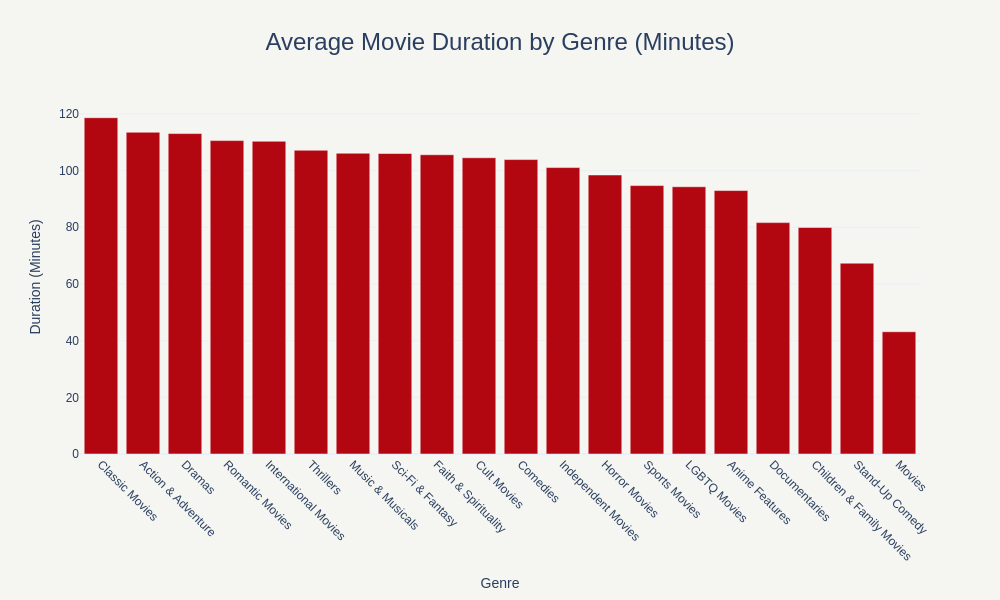
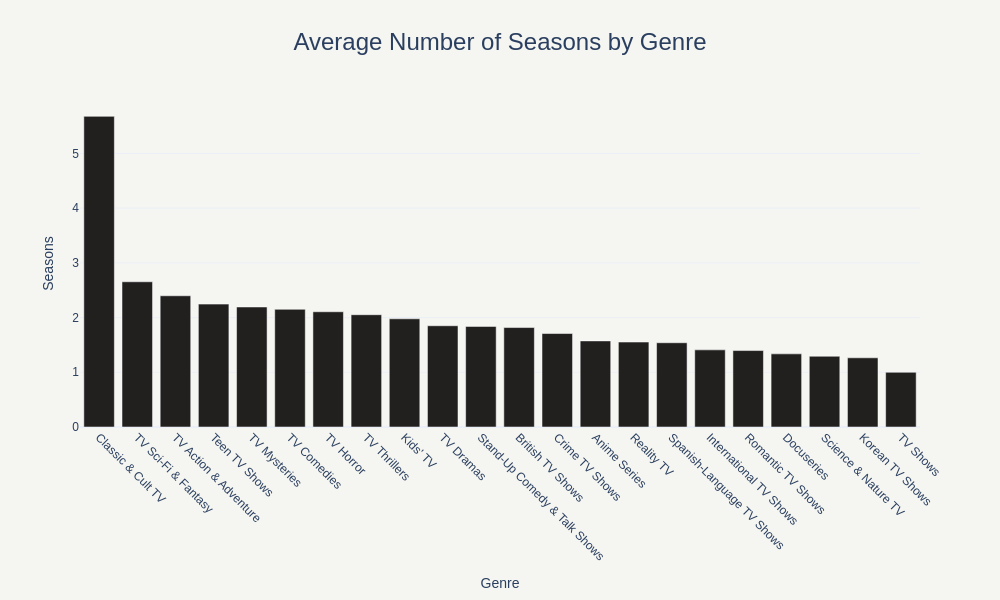

## Top 15 Directors Who Directed the Most Films

### Featured Directors
1. Rajiv Chilaka (22 films)
2. Jan Suter (21 films)
3. Raúl Campos (19 films)
4. Suhas Kadav (16 films)
5. Jay Karas (15 films)

### Chart Details:
- Red bars show number of films
- Black bars show number of series

In [20]:
director_data = []
for index, row in df.iterrows():
    if row['director'] != 'unknown':
        for director in row['director'].split(','):
            director_data.append({
                'director': director.strip(),
                'type': row['type']
            })

director_df = pd.DataFrame(director_data)
director_counts = director_df.groupby(['director', 'type']).size().reset_index(name='count')

movie_counts = director_counts[director_counts['type'] == 'Movie'].set_index('director')['count']
top_directors = movie_counts.nlargest(15).index

director_plot = director_counts[director_counts['director'].isin(top_directors)]

director_order = movie_counts[top_directors].index

fig = px.bar(director_plot,
             x='director',
             y='count',
             color='type',
             title='Top 15 Directors by Number of Movies',
             color_discrete_map={'Movie': '#b20710', 'TV Show': '#221f1f'},
             category_orders={'director': director_order})

fig.update_layout(
    xaxis_tickangle=45,
    title_x=0.5,
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    width=1200,
    height=800
)

fig.show()

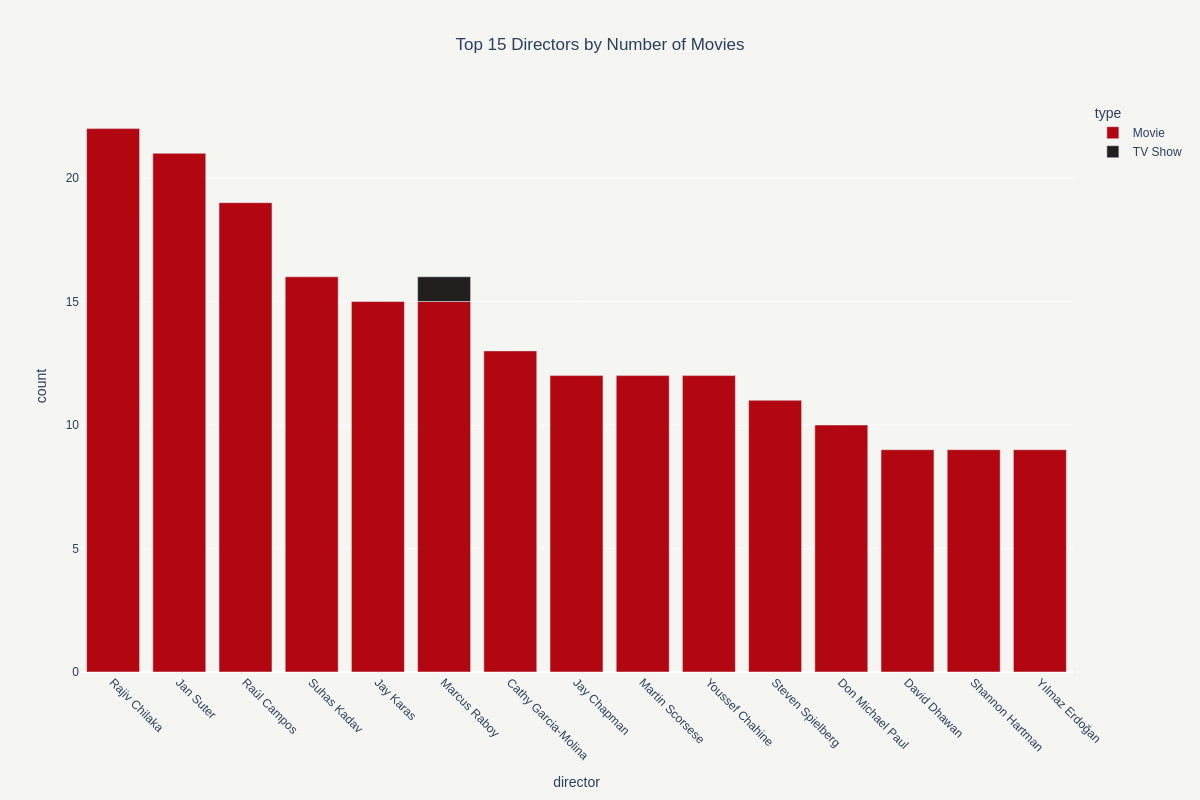

## Top 15 Actors with the Most Films

### Top Actors
1. Anupam Kher (42 productions)
- 41 films, 1 TV series
2. Shah Rukh Khan (35 films)
3. Naseeruddin Shah (32 films)
4. Akshay Kumar (30 films)
5. Om Puri (30 films)

### Observations:
- All the top five actors are from Hindi cinema
- Actors like Julie Tejwani, Rupali Bhosle and Rajesh Kava are in both films and TV series

In [21]:
cast_data = []
for index, row in df.iterrows():
    if row['cast'] != 'unknown':
        for actor in row['cast'].split(','):
            cast_data.append({
                'actor': actor.strip(),
                'type': row['type']
            })

cast_df = pd.DataFrame(cast_data)
cast_counts = cast_df.groupby(['actor', 'type']).size().reset_index(name='count')

movie_counts = cast_counts[cast_counts['type'] == 'Movie'].set_index('actor')['count']
top_actors = movie_counts.nlargest(15).index

cast_plot = cast_counts[cast_counts['actor'].isin(top_actors)]

actor_order = movie_counts[top_actors].index

fig = px.bar(cast_plot,
             x='actor',
             y='count',
             color='type',
             title='Top 15 Actors by Number of Movies',
             color_discrete_map={'Movie': '#b20710', 'TV Show': '#221f1f'},
             category_orders={'actor': actor_order})

fig.update_layout(
    xaxis_tickangle=45,
    title_x=0.5,
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    width=1200,
    height=800
)

fig.show()

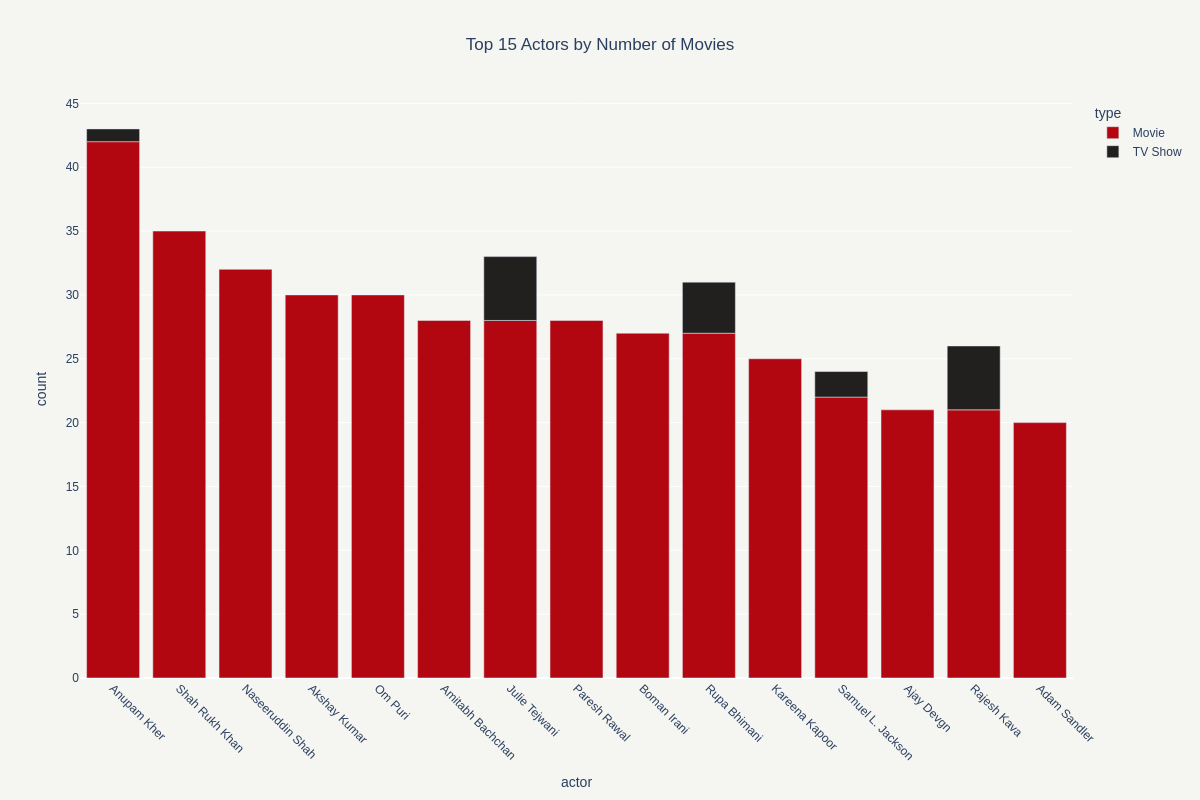

## Netflix Content Word Charts

In this chart, Netflix shows the most frequently used words in the description and titles with two different word clouds.

In [22]:
color_map = {
    'Movie': '#b20710',
    'TV Show': '#221f1f'
}

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return color_map['Movie'] if np.random.random() < 0.5 else color_map['TV Show']

wordcloud_title = WordCloud(width=1200, height=600,
                          background_color='#f5f5f1',
                          max_words=100,
                          prefer_horizontal=0.7,
                          color_func=grey_color_func,
                          collocations=False).generate(' '.join(df['title']))

wordcloud_desc = WordCloud(width=1200, height=600,
                         background_color='#f5f5f1',
                         max_words=100,
                         prefer_horizontal=0.7,
                         color_func=grey_color_func,
                         collocations=False).generate(' '.join(df['description']))

fig1 = px.imshow(wordcloud_title)
fig1.update_layout(
    title={
        'text': 'Netflix Titles Word Cloud',
        'font': {'color': '#221f1f', 'size': 24}
    },
    paper_bgcolor='#f5f5f1',
    plot_bgcolor='#f5f5f1',
    showlegend=False,
    xaxis_visible=False,
    yaxis_visible=False
)
fig1.show()

fig2 = px.imshow(wordcloud_desc)
fig2.update_layout(
    title={
        'text': 'Netflix Descriptions Word Cloud',
        'font': {'color': '#221f1f', 'size': 24}
    },
    paper_bgcolor='#f5f5f1',
    plot_bgcolor='#f5f5f1',
    showlegend=False,
    xaxis_visible=False,
    yaxis_visible=False
)
fig2.show()

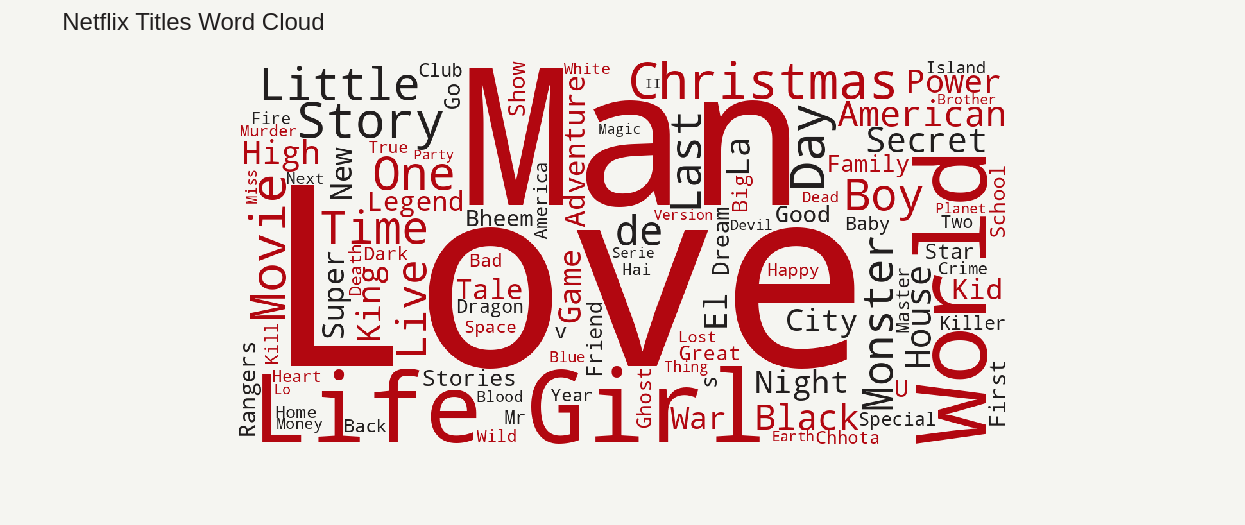
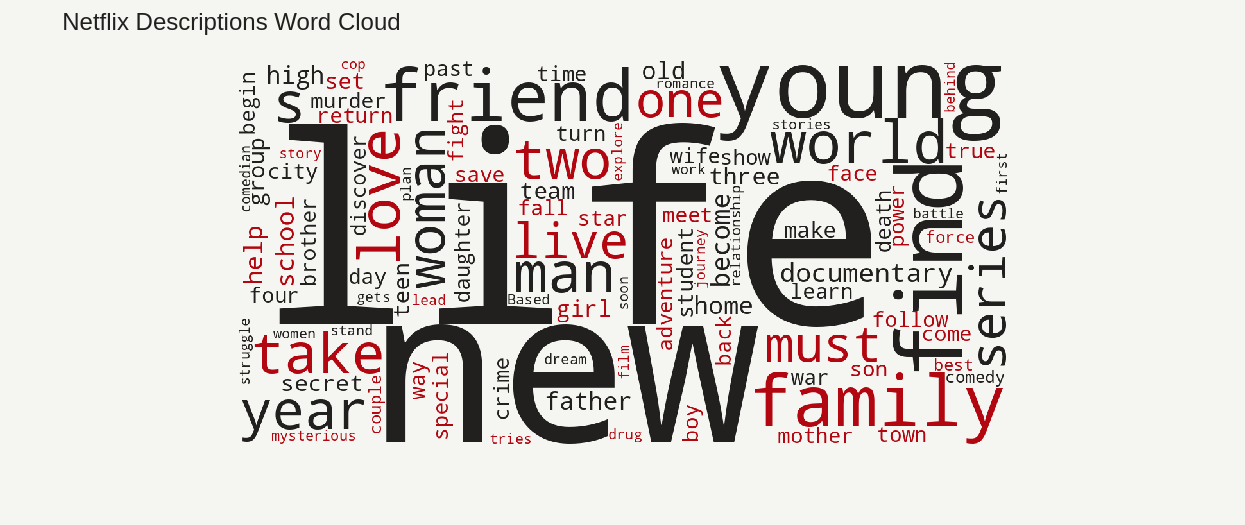

## Content Trends by Year

#### 2008-2015: Initial Period
- Both the number of movies and series is quite low
- The platform is still in the growth phase

#### 2015-2018: Rapid Growth Period
- A sharp increase begins from 2016
- There is a more significant increase in the number of movies

#### 2018-2020: Peak Period
- The number of movies reaches its highest point in 2019 (approximately 1400 movies)
- The number of series plateaus in 2020 (approximately 600 series)
- The difference between movies and series is the widest in this period

#### After 2020: Stabilization and Decline Period
- There is a significant decrease in the number of movies and series
- Main reasons:
* Disney+'s entry into the market and transfer of Disney content to its own platform
* Competition in the market from strong competitors such as Hulu, Amazon Prime, HBO Max
* Competitor platforms focusing on exclusive content production
* Increasing licensing costs
* COVID-19 pandemic affecting production processes

Note: The decline after 2020 is clearly due to the impact of streaming wars and increasing competition. It is also noteworthy that Netflix has started to invest more in its own original content during this period.

In [23]:
df['year_added'] = df['date_added'].dt.year
yearly_content = df.groupby(['year_added', 'type']).size().reset_index(name='count')

fig = px.line(yearly_content,
              x='year_added',
              y='count',
              color='type',
              title='Content Trends by Release Year',
              color_discrete_map={'Movie': '#b20710', 'TV Show': '#221f1f'})

fig.update_layout(
    title_x=0.5,
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    width=1000,
    height=600,
    xaxis_title='Year',
    yaxis_title='Number of Titles'
)

fig.show()

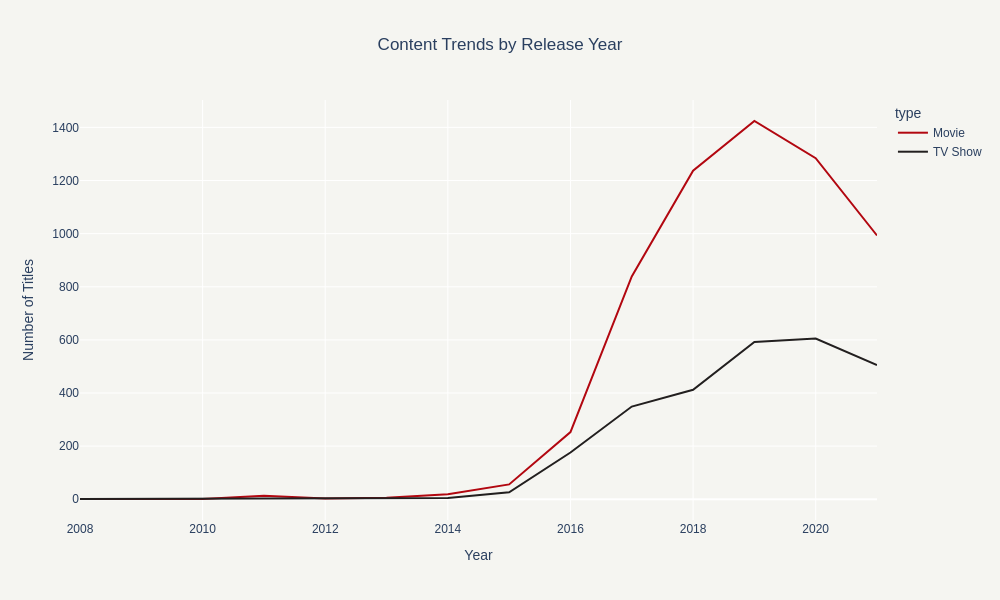

## Changes in Movie and TV Genres Over Time

These two graphs show the changes in the genres of movies and TV series on Netflix between 2008-2021. There are notable trends in both types of content:

### General Trends and Key Findings:

- **Growth Explosion (2016-2018)**:

- The most striking point in both graphs is the sharp increase after 2016
- This period coincides with the period when Netflix focused on original content production and opened up to global markets
>
- **Movie Trends**:
- Dramas and International Movies showed the highest increase
- The increase seen in almost all genres after 2018 shows that Netflix increased its investments in movies
- The decrease after 2020 can be explained by the impact of the COVID-19 pandemic on movie production
>
- **Series Trends**:
- International TV Shows, especially in 2019, showed a significant peak
- TV Dramas and International TV Shows showed a steady increase
>
- **Post-2020 Changes**:
- Slight decrease in both types of content a downward trend is observed
- This decline can be attributed to the pandemic effect and the increased competition environment

In [24]:
df['release_year'] = pd.to_datetime(df['date_added']).dt.year
genre_year_data = []

for index, row in df.iterrows():
    year = row['release_year']
    for genre in row['listed_in'].split(','):
        genre_year_data.append({
            'year': year,
            'genre': genre.strip(),
            'type': row['type']
        })

genre_year_df = pd.DataFrame(genre_year_data)
genre_year_counts = genre_year_df.groupby(['year', 'genre', 'type']).size().reset_index(name='count')

movie_top_genres = genre_year_counts[genre_year_counts['type'] == 'Movie'].groupby('genre')['count'].sum().nlargest(10).index
tv_top_genres = genre_year_counts[genre_year_counts['type'] == 'TV Show'].groupby('genre')['count'].sum().nlargest(10).index

movie_trends = genre_year_counts[(genre_year_counts['genre'].isin(movie_top_genres)) & 
                                (genre_year_counts['type'] == 'Movie')]
tv_trends = genre_year_counts[(genre_year_counts['genre'].isin(tv_top_genres)) & 
                             (genre_year_counts['type'] == 'TV Show')]

fig1 = px.line(movie_trends,
               x='year',
               y='count',
               color='genre',
               title='Movie Genre Trends Over Time (Top 10 Genres)',
               color_discrete_sequence=px.colors.qualitative.Set3)

fig1.update_layout(
    title_x=0.5,
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    width=1200,
    height=600,
    showlegend=True,
    xaxis_title='Year',
    yaxis_title='Number of Movies'
)

fig2 = px.line(tv_trends,
               x='year',
               y='count',
               color='genre',
               title='TV Show Genre Trends Over Time (Top 10 Genres)',
               color_discrete_sequence=px.colors.qualitative.Set3)

fig2.update_layout(
    title_x=0.5,
    plot_bgcolor='#f5f5f1',
    paper_bgcolor='#f5f5f1',
    width=1200,
    height=600,
    showlegend=True,
    xaxis_title='Year',
    yaxis_title='Number of TV Shows'
)

fig1.show()
fig2.show()

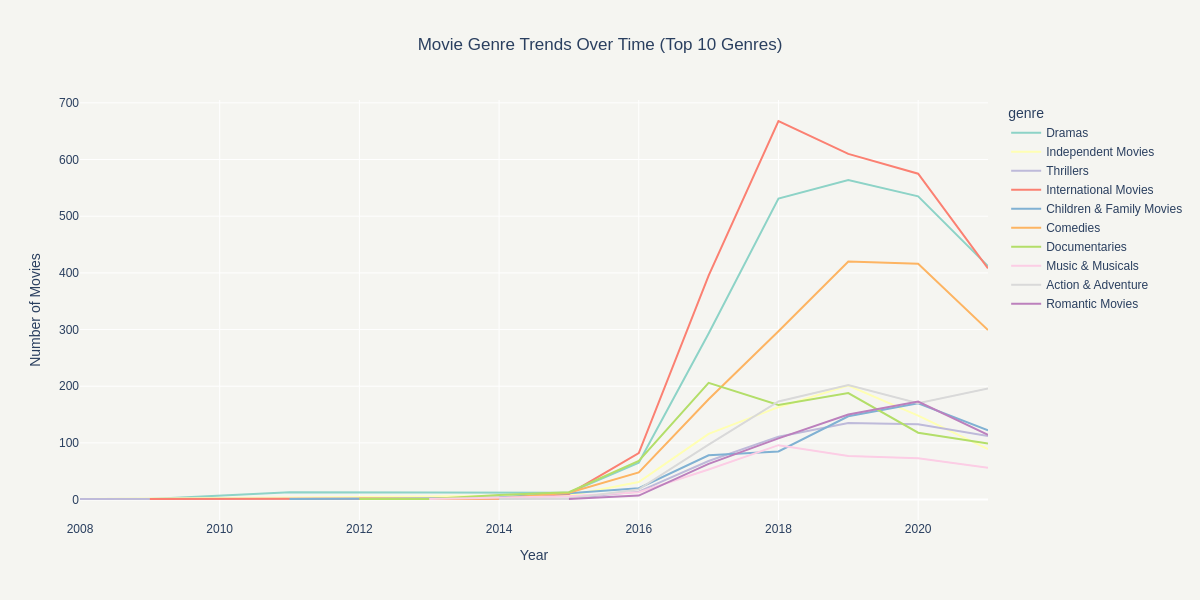
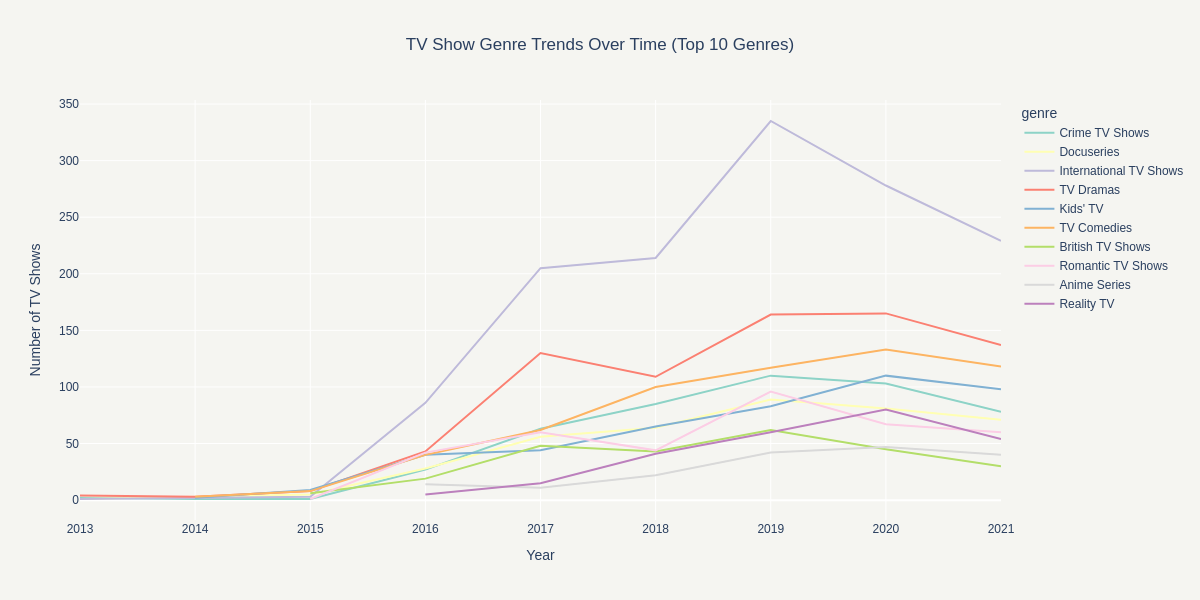